In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
!pip install statsmodels
from scipy.optimize import curve_fit
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit
import colorsys

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python3.9 -m pip install --upgrade pip


In [6]:
sim_semi_df = pd.read_csv("dS32p0_summary.csv", delimiter=",")
sim_mix_df = pd.read_csv("dS32p0mix_summary.csv", delimiter=";")
sim_mix_38_df = pd.read_csv("dS38p0_mixed_summary.csv", delimiter=",")
sim_mix_26_df = pd.read_csv("dS26p0_mixed_summary.csv", delimiter=",")
sim_semi_38_df = pd.read_csv("dS38p0_semi_summary.csv", delimiter=",")
sim_semi_26_df = pd.read_csv("dS26p0_semi_summary.csv", delimiter=",")

In [7]:
perc_homo_data = pd.read_csv("percentage_homo_cells_df_from_curve_max100.csv", delimiter=",")
perc_homo_data

,time,perc_homoplasmic_cells
0,0.0,13.796744
1,1.5,13.811090
2,3.0,13.974290
3,4.5,15.750380
4,6.0,28.698290
5,7.5,49.250570


In [8]:
sim_mix_heatmap = sim_mix_df.pivot(index="ndau", columns="nspl", values="dist")
sim_semi_heatmap = sim_semi_df.pivot(index="ndau", columns="nspl", values="dist")

sim_mix_38_heatmap = sim_mix_38_df.pivot(index="ndau", columns="nspl", values="dist")
sim_mix_26_heatmap = sim_mix_26_df.pivot(index="ndau", columns="nspl", values="dist")
sim_semi_38_heatmap = sim_semi_38_df.pivot(index="ndau", columns="nspl", values="dist") 
sim_semi_26_heatmap = sim_semi_26_df.pivot(index="ndau", columns="nspl", values="dist")

In [45]:
sim_mix_df

,Unnamed: 0,nspl,ndau,fbt0,fbt15,fbt3,fbt45,fbt6,fbt75,dist
0,1,1,1,0.117647,0.558824,0.779412,0.889706,0.944853,0.972426,1.336348
1,2,1,2,0.117647,0.558824,0.692647,0.820588,0.894118,0.939706,1.221228
2,3,1,3,0.117647,0.402941,0.592647,0.737500,0.845956,0.909926,1.048216
3,4,1,4,0.117647,0.223529,0.427941,0.634559,0.787868,0.881618,0.848907
4,5,1,5,0.117647,0.147059,0.376471,0.605147,0.751103,0.858824,0.778790
...,...,...,...,...,...,...,...,...,...,...
395,396,25,12,0.117647,0.144118,0.155882,0.169118,0.187868,0.207353,0.303283
396,397,25,13,0.117647,0.138235,0.150000,0.159559,0.171324,0.188603,0.325970
397,398,25,14,0.117647,0.138235,0.147059,0.159559,0.175735,0.193382,0.319877
398,399,25,15,0.117647,0.141176,0.148529,0.157353,0.165809,0.180882,0.335100


In [52]:
mask = ((sim_mix_df['ndau'] == 7) & (sim_mix_df['nspl'] == 23)) | ((sim_mix_df['ndau'] == 12) & (sim_mix_df['nspl'] == 7))  | ((sim_mix_df['ndau'] == 16) & (sim_mix_df['nspl'] == 1))

selected_values = sim_mix_df.loc[mask, 'fbt75']
print(selected_values)

15     1.000
107    0.375
358    0.325
Name: fbt75, dtype: float64


In [48]:
mask = ((sim_mix_df['ndau'] == 7) & (sim_mix_df['nspl'] == 23)) | ((sim_mix_df['ndau'] == 12) & (sim_mix_df['nspl'] == 7))
sim_mix_df.loc[mask, 'fbt75'] = [0.375, 0.325]

In [49]:
sim_mix_t75_heatmap = sim_mix_df.pivot(index="ndau", columns="nspl", values="fbt75")

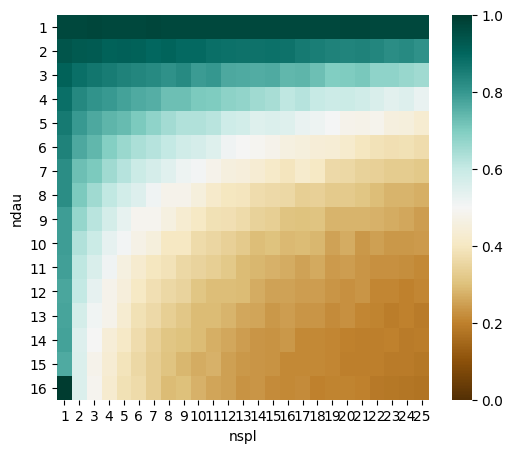

In [66]:
fig, ax = plt.subplots(figsize=(6, 5))
heatmap = sns.heatmap(sim_mix_t75_heatmap, vmax=1, vmin=0, cmap='BrBG')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.rcParams['svg.fonttype'] = 'none'

plt.savefig('sim_hits_mix_t75_50perchomo_heatmap.svg', transparent= True)

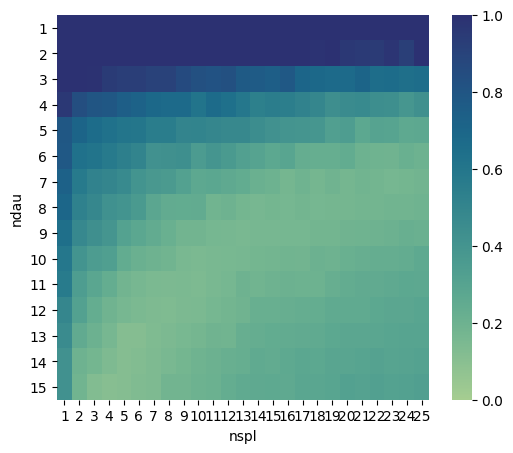

In [12]:
fig, ax = plt.subplots(figsize=(6, 5))
heatmap = sns.heatmap(sim_mix_38_heatmap, vmax=1, vmin=0, cmap='crest')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('sim_hits_mix_38_heatmap.svg', transparent= True)

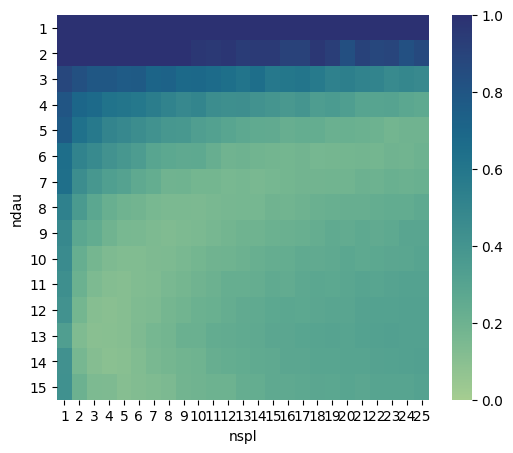

In [11]:
fig, ax = plt.subplots(figsize=(6, 5))
heatmap = sns.heatmap(sim_mix_26_heatmap, vmax=1, vmin=0, cmap='crest')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('sim_hits_mix_26_heatmap.svg', transparent= True)

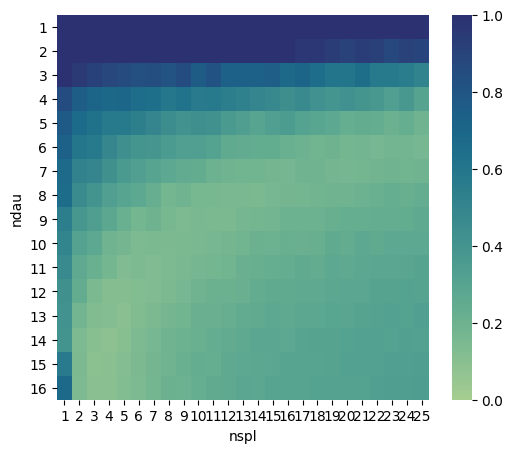

In [258]:
fig, ax = plt.subplots(figsize=(6, 5))
heatmap = sns.heatmap(sim_mix_heatmap, vmax=1, vmin=0, cmap='crest')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('sim_hits_mix_heatmap.svg', transparent= True)

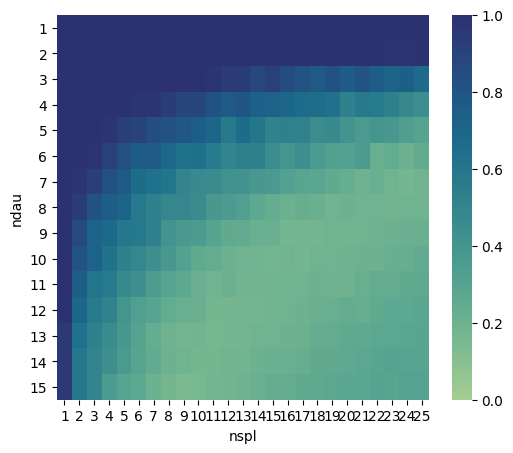

In [15]:
fig, ax = plt.subplots(figsize=(6, 5))
heatmap = sns.heatmap(sim_semi_38_heatmap, vmax=1, vmin=0, cmap='crest')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('sim_hits_semi_38_heatmap.svg', transparent= True)

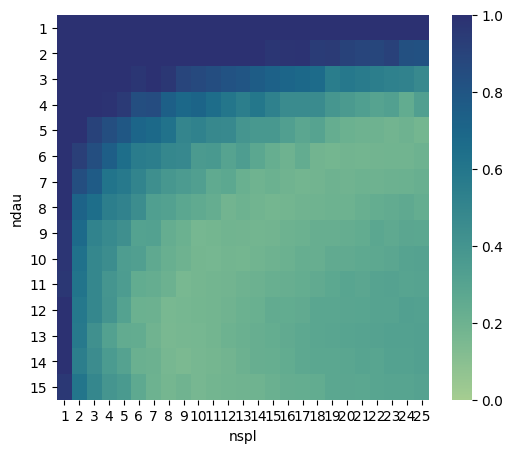

In [16]:
fig, ax = plt.subplots(figsize=(6, 5))
heatmap = sns.heatmap(sim_semi_26_heatmap, vmax=1, vmin=0, cmap='crest')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('sim_hits_semi_26_heatmap.svg', transparent= True)

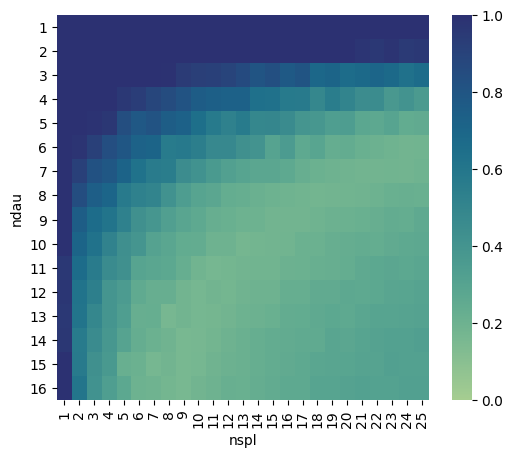

In [225]:
fig, ax = plt.subplots(figsize=(6, 5))
heatmap = sns.heatmap(sim_semi_heatmap, vmax=1, vmin=0, cmap='crest')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('sim_hits_semi_heatmap.svg', transparent= True)

In [8]:
def create_result_df(sim_df, ndau, nspl):
    # Filter DataFrame based on ndau and nspl
    filtered_df = sim_df[(sim_df['ndau'] == ndau) & (sim_df['nspl'] == nspl)]

    # Reshape the DataFrame
    melted_df = filtered_df.melt(id_vars=['Unnamed: 0', 'nspl', 'ndau', 'dist'], 
                                  value_vars=['fbt0', 'fbt15', 'fbt3', 'fbt45', 'fbt6', 'fbt75'],
                                  var_name='time', value_name='perc_homo')

    # Assign specific values to the 'time' column
    melted_df['time'] = [0.0, 1.5, 3.0, 4.5, 6.0, 7.5]

    # Create the resulting DataFrame
    result_df = melted_df[['time', 'perc_homo']]

    return result_df


In [41]:
def create_result_dfs(sim_df, combinations):
    result_dfs = []

    for ndau, nspl in combinations:
        # Filter DataFrame based on ndau and nspl
        filtered_df = sim_df[(sim_df['ndau'] == ndau) & (sim_df['nspl'] == nspl)]

        # Reshape the DataFrame
        melted_df = filtered_df.melt(id_vars=['Unnamed: 0', 'nspl', 'ndau', 'dist'], 
                                      value_vars=['fbt0', 'fbt15', 'fbt3', 'fbt45', 'fbt6', 'fbt75'],
                                      var_name='time', value_name='perc_homo')

        # Assign specific values to the 'time' column
        melted_df['time'] = [0.0, 1.5, 3.0, 4.5, 6.0, 7.5]

        # Create the resulting DataFrame
        result_df = melted_df[['time', 'perc_homo']]

        # Multiply 'perc_homo' column by 100
        result_df['perc_homo'] = result_df['perc_homo'] * 100

        result_dfs.append(result_df)

    return result_dfs

In [412]:
def plot_result_dfs(result_dfs, labels, actual_data=None):
    plt.figure(figsize=(10, 5))

    # Generate a colormap with as many colors as there are combinations
    colors = cm.YlGnBu_r([i / len(result_dfs) for i in range(len(result_dfs))])

    # Define a list of markers to use
    markers = [ '^' ,'s', 'v','x', '<', '>', 'D', 'P', '*', '+']

    for i, df in enumerate(result_dfs):
        # Use a different marker for each 'i'
        marker_index = i % len(markers)
        plt.plot(df['time'], df['perc_homo'], marker=markers[marker_index], linestyle='-', label=labels[i], color=colors[i])

    if actual_data is not None:
        plt.plot(actual_data['time'], actual_data['perc_homoplasmic_cells'], marker= 'o', linewidth=3, linestyle='-', label='Actual Data', color='black')

    plt.xlabel('Time (in hours)')
    plt.ylabel('Percentage of Homoplasmic Cells')
    plt.ylim(0, 100)
    plt.legend()
    
    return plt

/var/folders/nh/0n1p2d3s3g54cr2b2mtcdz_80000gq/T/ipykernel_29580/3831360509.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['perc_homo'] = result_df['perc_homo'] * 100
/var/folders/nh/0n1p2d3s3g54cr2b2mtcdz_80000gq/T/ipykernel_29580/3831360509.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['perc_homo'] = result_df['perc_homo'] * 100
/var/folders/nh/0n1p2d3s3g54cr2b2mtcdz_80000gq/T/ipykernel_29580/3831360509.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy 

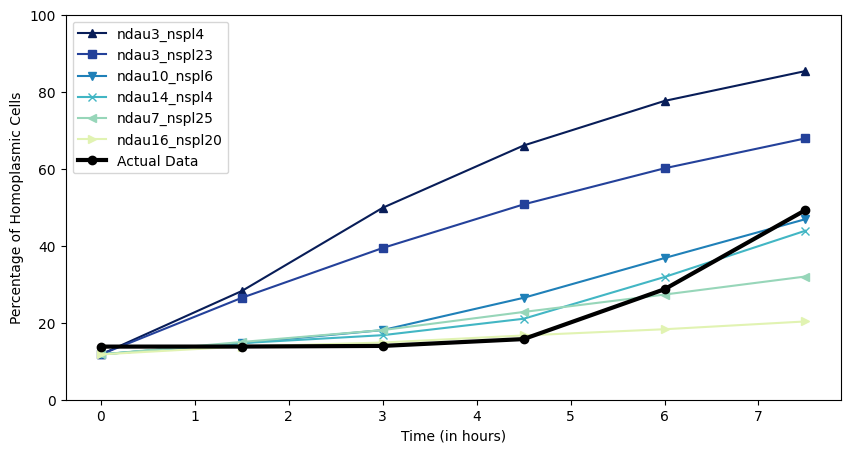

In [414]:
#combinations = [(3, 4), (6, 10), (10, 5), (11, 5),(12, 9), (14, 13), (15, 20), (16, 3),  (7, 2)]
combinations = [(3, 4), (3, 23), (10, 6), (14, 4), (7, 25), (16, 20), ]
result_dfs = create_result_dfs(sim_mix_df, combinations)

labels = [f'ndau{ndau}_nspl{nspl}' for ndau, nspl in combinations]

sigmoid_curves_mix = plot_result_dfs(result_dfs, labels, actual_data=perc_homo_data)   
sigmoid_curves_mix.savefig('sigmoid_curves_sim_mix.svg', transparent=True)
#sigmoid_curves_mix.show()

In [387]:
sim_mix_df.nsmallest(10, 'dist')

,Unnamed: 0,nspl,ndau,fbt0,fbt15,fbt3,fbt45,fbt6,fbt75,dist
61,62,4,14,0.117647,0.147059,0.167647,0.210294,0.318750,0.438971,0.089071
46,47,3,15,0.117647,0.141176,0.160294,0.222059,0.343382,0.479596,0.091431
62,63,4,15,0.117647,0.144118,0.164706,0.219853,0.313235,0.433456,0.095581
63,64,4,16,0.117647,0.147059,0.163235,0.213971,0.306985,0.425368,0.095609
47,48,3,16,0.117647,0.147059,0.164706,0.219853,0.352574,0.488235,0.096561
76,77,5,13,0.117647,0.147059,0.161765,0.219118,0.326103,0.429596,0.101303
45,46,3,14,0.117647,0.147059,0.164706,0.225735,0.357353,0.496324,0.103625
77,78,5,14,0.117647,0.141176,0.163235,0.208824,0.306618,0.410110,0.103839
75,76,5,12,0.117647,0.144118,0.166176,0.241176,0.342279,0.448162,0.114773
59,60,4,12,0.117647,0.141176,0.166176,0.242647,0.355147,0.476654,0.115187


In [20]:
ndau11_nspl5_df = create_result_df(sim_mix_df, ndau=11, nspl=5)
ndau11_nspl5_df['perc_homo'] = ndau11_nspl5_df['perc_homo'] * 100
print(ndau11_nspl5_df)

   time  perc_homo
0   0.0  11.764706
1   1.5  14.411765
2   3.0  17.941176
3   4.5  25.441176
4   6.0  35.404412
5   7.5  45.955882
